# Credit Card Fraud Detection

### Importing Libraries

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Loading The Dataset In a Pandas Dataframe

In [23]:
credit_card_data = pd.read_csv('creditcard.csv')

# displaying first 5 rows from the dataset
credit_card_data.head()

In [31]:
# displaying the last 5 rows of the dataset
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [33]:
# showing the dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [35]:
# checking the number of missing values
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [37]:
# distribution of legit transaction and fraudulent transaction
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

### This dataset is highly unbalanced.

#### 0 ---> Normal Transaction

#### 1 ---> Fraudulent Transaction

In [43]:
# seperating the data for analysis
legit = credit_card_data[credit_card_data.Class==0]
fraud = credit_card_data[credit_card_data.Class==1]

In [45]:
#printing the dimensions of the two dataframes
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [47]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [51]:
# statistical measures of the data
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [53]:
# comparing the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Under-Sampling

#### Build a sample dataset containing similar distribution of normal transactions and fraudulent transactions

#### Number of fraudulent traansactions ---> 492

In [64]:
legit_sample = legit.sample(n=492)

#### Concatenating two dataframes

In [67]:
new_dataset = pd.concat([legit_sample, fraud], axis = 0)

In [73]:
# displaying first 5 rows of the new dataframe
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
125578,77723.0,-0.775948,1.213350,1.169410,0.024428,-0.483990,-0.945602,0.352309,0.393008,-0.471446,...,-0.184400,-0.659280,0.075479,0.345991,-0.185847,0.075306,0.130737,0.057719,17.99,0
150405,93287.0,-0.066275,0.982986,-0.555012,0.521062,1.170792,-1.316036,1.946020,-0.628836,0.360671,...,0.223982,0.799199,0.128060,-0.012703,-0.634383,-0.761000,0.189889,0.266131,104.03,0
167900,118954.0,2.241633,-1.431302,-0.848950,-1.547085,-1.420370,-0.768447,-1.164420,-0.090174,-1.348331,...,-0.117270,0.115172,0.246673,-0.026613,-0.258977,-0.177043,0.001767,-0.063373,15.00,0
223989,143608.0,-0.555175,1.202091,-0.175900,0.885829,1.923693,-0.006387,1.912646,-0.402967,-0.992253,...,-0.070151,-0.059644,-0.523943,-0.086150,1.239124,-0.206542,-0.136840,-0.132312,85.56,0
176333,122723.0,1.339394,-1.530660,-1.010668,0.700516,-0.451091,0.558250,-0.076791,0.004400,1.612546,...,-0.207424,-1.044475,0.001956,0.033749,-0.331690,-0.682806,-0.021130,0.028508,359.80,0


In [75]:
# displaying the last five rows of the new dataframe
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [79]:
# find ou the value counts
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [81]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94472.544715,-0.151531,0.112983,-0.080380,-0.116425,0.107898,0.103208,-0.000939,0.041893,-0.005396,...,-0.005670,0.029559,-0.051070,0.005059,0.012113,0.023879,0.027845,0.005734,0.006192,80.260061
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Splitting The Data Into Features And Targets

In [84]:
X = new_dataset.drop(columns='Class',axis=1)
Y = new_dataset['Class']

In [86]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
125578   77723.0 -0.775948  1.213350  1.169410  0.024428 -0.483990 -0.945602   
150405   93287.0 -0.066275  0.982986 -0.555012  0.521062  1.170792 -1.316036   
167900  118954.0  2.241633 -1.431302 -0.848950 -1.547085 -1.420370 -0.768447   
223989  143608.0 -0.555175  1.202091 -0.175900  0.885829  1.923693 -0.006387   
176333  122723.0  1.339394 -1.530660 -1.010668  0.700516 -0.451091  0.558250   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [88]:
print(Y)

125578    0
150405    0
167900    0
223989    0
176333    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


### Splitting The Data Into Training Data And Testing Data

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

In [93]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


### Model Training

#### Logistic Regression

In [140]:
model_LR = LogisticRegression()

In [144]:
# training the Logistic Regression Model with Training Data
model_LR.fit(X_train, Y_train)

LogisticRegression()

### Model Evaluation

#### Accuracy Score

In [244]:
# accuracy on training data
X_train_prediction = model_LR.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [246]:
print('Accuracy On Training Data :', training_data_accuracy)

Accuracy On Training Data : 0.9212198221092758


In [248]:
# accuracy on testing data
X_test_prediction = model_LR.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [252]:
print('Accuracy On Testing Data :', test_data_accuracy)

Accuracy On Testing Data : 0.8883248730964467


### Model Training

#### Random Forest 

In [256]:
model_RFC = RandomForestClassifier()

In [258]:
# training the Logistic Regression Model with Training Data
model_RFC.fit(X_train, Y_train)

RandomForestClassifier()

### Model Evaluation

#### Accuracy Score

In [262]:
# accuracy on training data
X_train_prediction = model_RFC.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [264]:
print('Accuracy On Training Data :', training_data_accuracy)

Accuracy On Training Data : 1.0


In [266]:
# accuracy on testing data
X_test_prediction = model_RFC.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [268]:
print('Accuracy On Testing Data :', test_data_accuracy)

Accuracy On Testing Data : 0.9187817258883249


### Comparing The Two Models

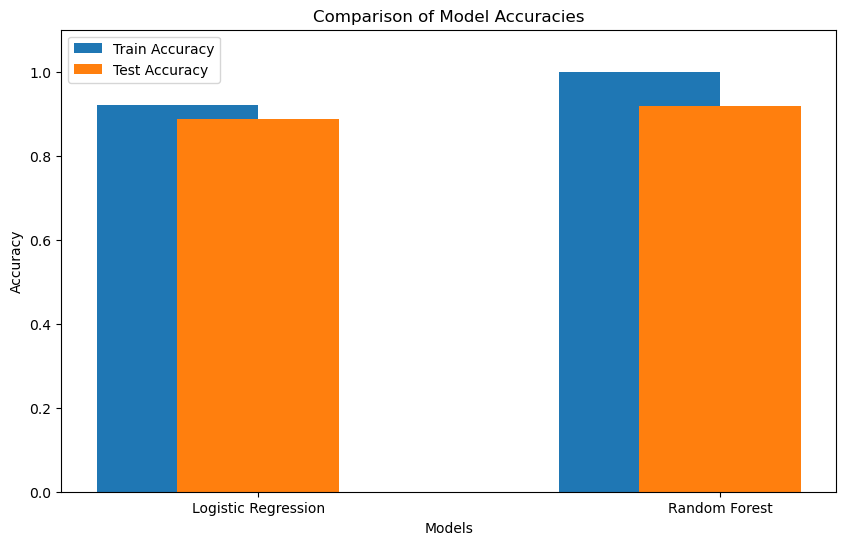

In [270]:
# Assuming you have already calculated the accuracy for both models
logistic_regression_train_acc = 0.9212198221092758
logistic_regression_test_acc = 0.8883248730964467
random_forest_train_acc = 1.0
random_forest_test_acc = 0.9187817258883249

# Data for plotting
models = ['Logistic Regression', 'Random Forest']
train_accuracy = [logistic_regression_train_acc, random_forest_train_acc]
test_accuracy = [logistic_regression_test_acc, random_forest_test_acc]

x = range(len(models))

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bar_width = 0.35

plt.bar(x, train_accuracy, width=bar_width, label='Train Accuracy', align='center')
plt.bar(x, test_accuracy, width=bar_width, label='Test Accuracy', align='edge')

# Adding details to the plot
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.xticks([i + bar_width / 2 for i in x], models)
plt.legend()
plt.ylim([0, 1.1])

# Show the plot
plt.show()